# Udacity Data Scientist Nanodegree - Project 1
*Exploration of data from a 2019 Stack Overflow Survey, folowing the CRISP-DM data mining standard*

B. W., January 2020 

## Business Understanding

Data gathered during the Stack Overflow survey has an abundance of data regarding Github user's backgrounds, careers, interests and job satisfaction. Because Github is primarily a platform for code sharing and version control, Github user's data can give insight on programmers and the technology sector.   

The following questions are of interest to me as a newcomer to the world of tech: 

1. How important are open source tools to Github users?
	1. Which environment do they use
	2. Which operating system do they use
	3. How often do they contribute to open source?
	4. What are their opinions of open source code?

2. What background do Github users have?
	1. What is the gender distribution of Github users?
	2. How old are Github users?
	3. What level of education do they have?
	4. What major do Github users have?
	5. Where do Github users live?

3. What are the trends for Github user's salaries? 
	1. How much money do Github users earn does this depend on their gender?
	2. Is there a correlation between age and income?
	3. How do salaries compare across 14 countries with the most amount of Github users, and South Africa (my country of residence)?

## Data Understanding

Survey results for 2019 were downloaded from Github as `survey_results_public.csv`. An explanation of the column labels is given `survey_results_schema.csv` in the git repository. 

### Data Import

In [2]:
# import relevant libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [41]:
# import and make a copy of survey data 
df_original = pd.read_csv("./data/survey_results_public.csv")
df = df_original.copy()

### Assessment

In [7]:
# get a first pass understanding of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88883 entries, 0 to 88882
Data columns (total 85 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Respondent              88883 non-null  int64  
 1   MainBranch              88331 non-null  object 
 2   Hobbyist                88883 non-null  object 
 3   OpenSourcer             88883 non-null  object 
 4   OpenSource              86842 non-null  object 
 5   Employment              87181 non-null  object 
 6   Country                 88751 non-null  object 
 7   Student                 87014 non-null  object 
 8   EdLevel                 86390 non-null  object 
 9   UndergradMajor          75614 non-null  object 
 10  EduOther                84260 non-null  object 
 11  OrgSize                 71791 non-null  object 
 12  DevType                 81335 non-null  object 
 13  YearsCode               87938 non-null  object 
 14  Age1stCode              87634 non-null

In [8]:
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In order to answer the questions asked above, not all columns are necessary. Redundant columns in this dataset shall be removed. Then columns shall be converted into appropriate data types and nan and 0 values will be removed, if necessary. 

## Data Preparation

In order to answer the above questions, dataframe will be reduced to revelvant columns only. 
for Q1, relevant columns are 'OpenSourcer', 'OpenSource', 'DevEnviron' and 'OpSys'.

Data for Q1: How important are open source tools to Github users?

For this section we will look at how often users contribute to open source (OpenSourcer), the perceived quality of open source software (OpenSource) and the preference of operating system and the popularity of Linux in particular (OpSys). 

In [14]:
# columns relevant to open source (Q1)
df_open_source = df[['OpenSourcer', 'OpenSource', 'DevEnviron', 'OpSys']]




''

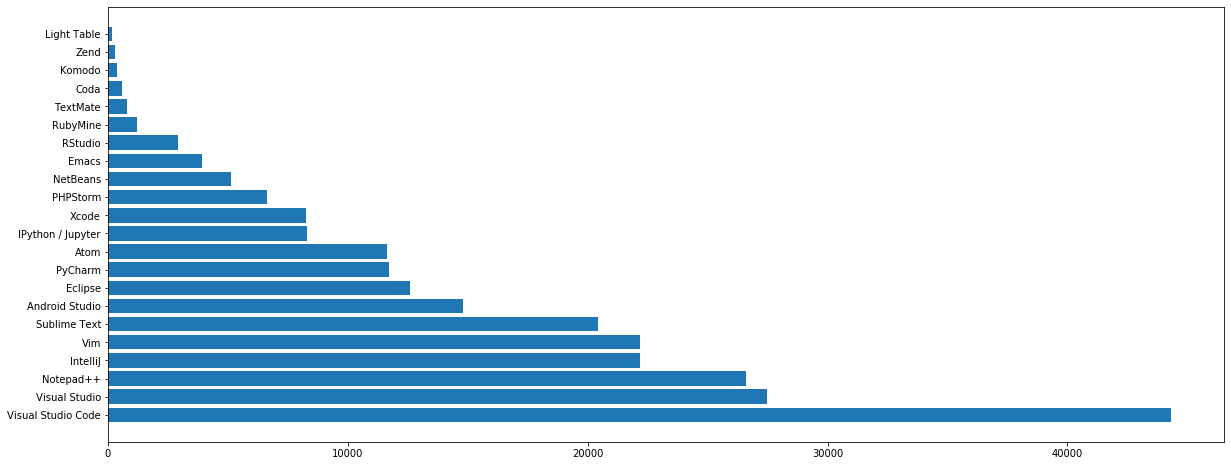

In [70]:
enviro = df['DevEnviron'].str.split(pat=';', expand=True).unstack().value_counts()

fig, ax = plt.subplots(figsize=(20, 8))
ax.barh(enviro.index, width=enviro)
;

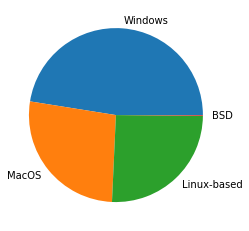

In [46]:
plt.pie(df['OpSys'].value_counts(), labels=df['OpSys'].value_counts().index);

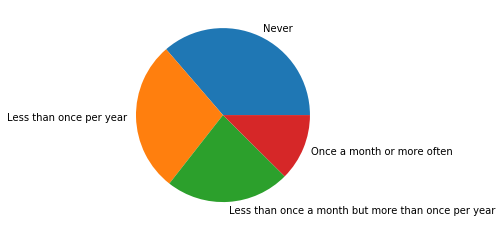

In [125]:
plt.pie(df['OpenSourcer'].value_counts(), labels = df['OpenSourcer'].value_counts().index);

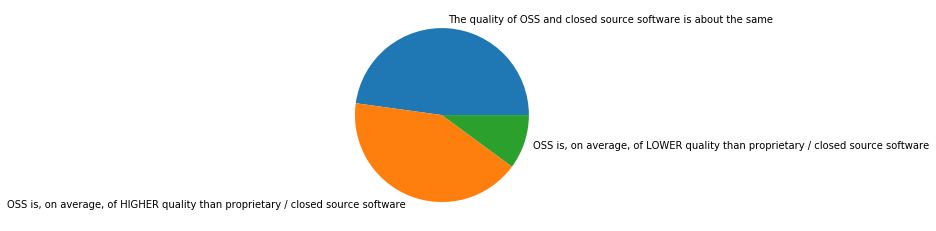

In [43]:
plt.pie(df['OpenSource'].value_counts(), labels = df['OpenSource'].value_counts().index);

In [47]:
df_background = df[['Country', 'Student', 'EdLevel', 'UndergradMajor', 'Age', 'Gender']]

Man      77919
Woman     6344
Other     4620
Name: Gender, dtype: int64


' '

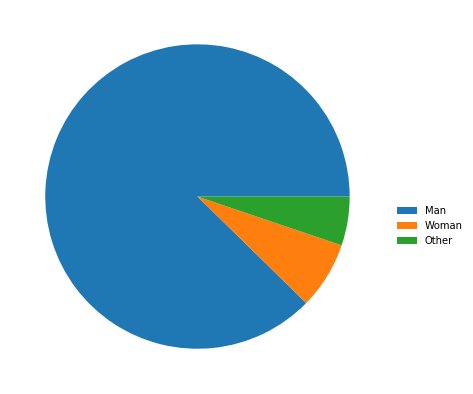

In [49]:
# to make the piechart more readable, genders other than 'Man' and 'Woman' have been labeled 'Other'
df_gender = df
df_gender.loc[np.logical_and(df_gender['Gender']!='Man', df_gender['Gender']!='Woman'), 'Gender'] = 'Other'
print(df_gender['Gender'].value_counts())     
      
fig, ax = plt.subplots(figsize=(7, 7))
ax.pie(df['Gender'].value_counts())
ax.legend(labels=df['Gender'].value_counts().index,  frameon=False, bbox_to_anchor=(1, 0.5))
;  
      

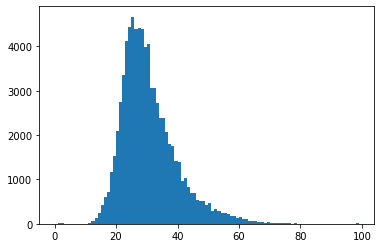

In [124]:
plt.hist(df['Age'], bins=range(0, 100));

''

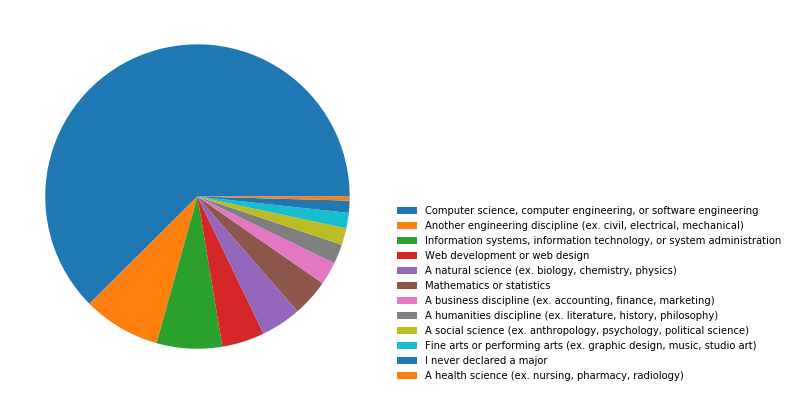

In [104]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.pie(df['UndergradMajor'].value_counts())
ax.legend(labels=df['UndergradMajor'].value_counts().index,  frameon=False, bbox_to_anchor=(1, 0.5))
;

''

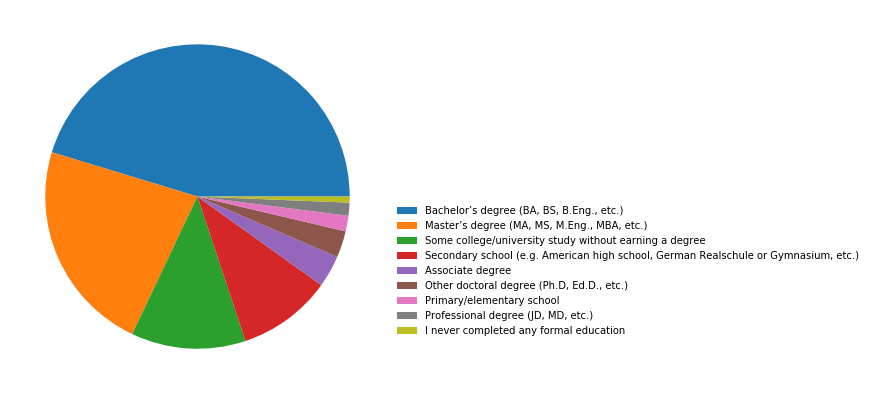

In [103]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.pie(df['EdLevel'].value_counts())
ax.legend(labels=df['EdLevel'].value_counts().index,  frameon=False, bbox_to_anchor=(1, 0.5))
;

<BarContainer object of 15 artists>

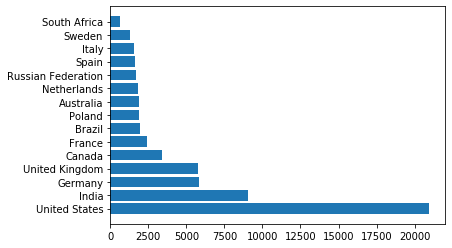

In [87]:
country_sum = df['Country'].value_counts()
country_sum = country_sum[np.logical_or(country_sum>=1000, country_sum.index=='South Africa')]

fig, ax = plt.subplots()
ax.barh(country_sum.index, width=country_sum)

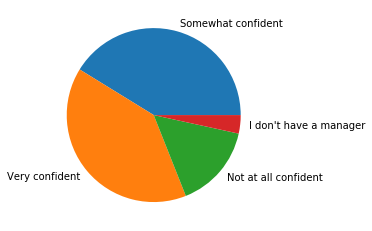

In [138]:
plt.pie(df['MgrIdiot'].value_counts(), labels=df['MgrIdiot'].value_counts().index);

''

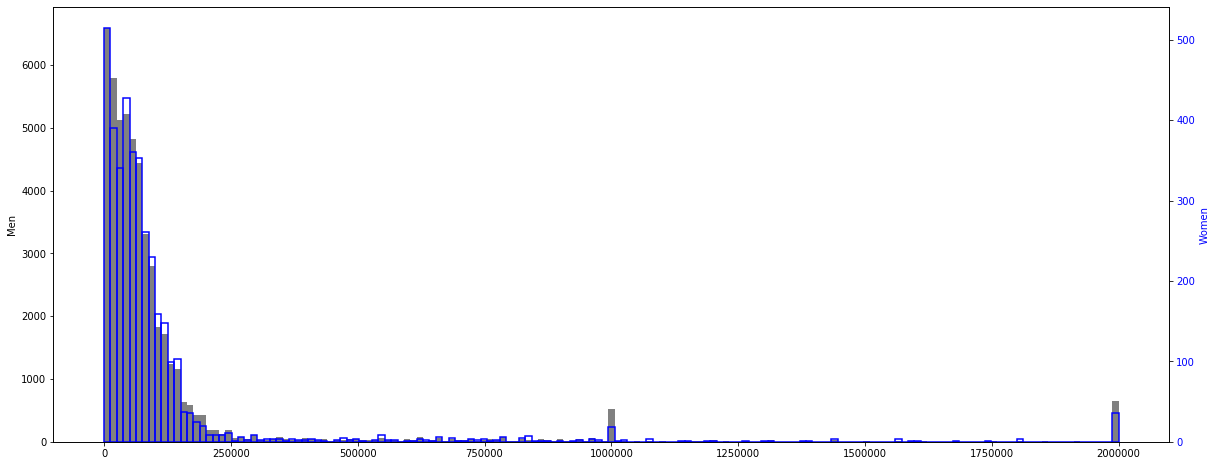

In [62]:
fig, ax = plt.subplots(figsize=(20, 8))

ax.hist(df[df['Gender']=='Man']['ConvertedComp'], bins=np.linspace(0, 2000000, 160), color='grey')
ax.set_ylabel('Men')
axtwin = ax.twinx()
axtwin.hist(df[df['Gender']=='Woman']['ConvertedComp'], bins=np.linspace(0, 2000000, 160), fill=False, edgecolor='b', linewidth=1.5)
axtwin.set_ylabel('Women', color='b')
axtwin.tick_params(axis='y', labelcolor='b')

;

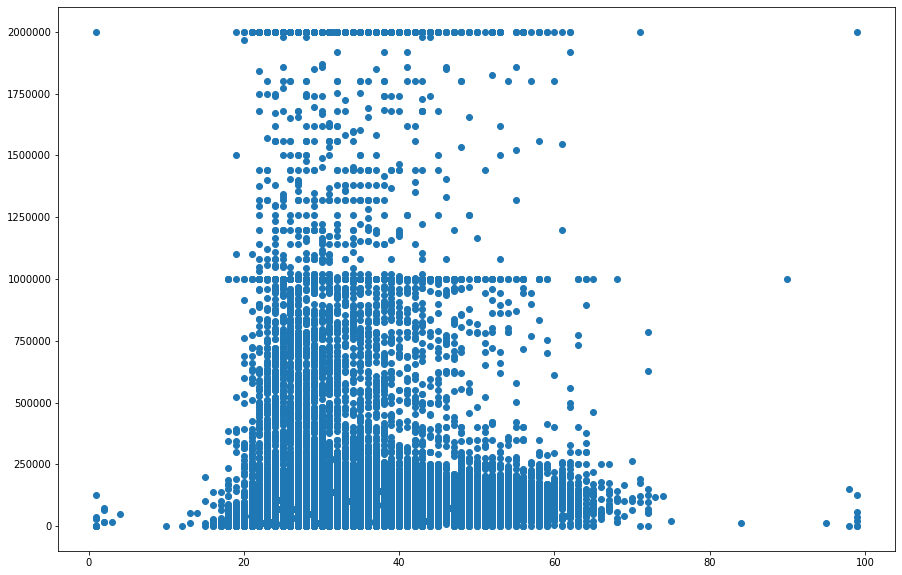

In [271]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.scatter(df['Age'], df['ConvertedComp'])

''

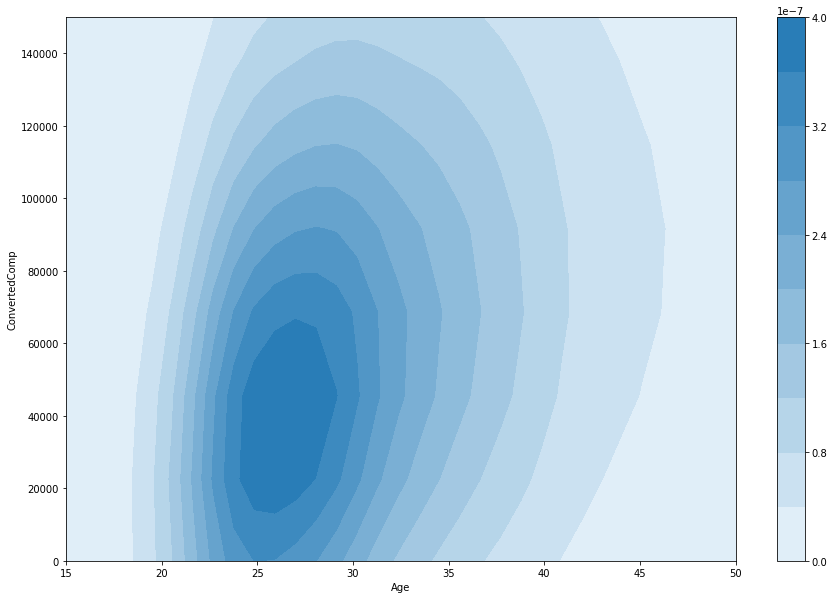

In [51]:
fig, ax = plt.subplots(figsize=(15, 10))
dfplt = df.dropna(subset=['Age', 'ConvertedComp'])
ax = sns.kdeplot(dfplt['Age'], dfplt['ConvertedComp'], shade=True, cbar=True)
#ax.scatter(dfplt['Age'], dfplt['ConvertedComp'], s=1, color="b")
ax.set_xlim(left=15, right=50)
ax.set_ylim(top=150000, bottom=0)
;

In [460]:
test = df.groupby('Country')

test = test.filter(lambda x: len(x)>=1000 or x.name == 'South Africa')
test.groupby('Country')['ConvertedComp'].median().sort_values(ascending=False).index
#test['Country'].value_counts()

Index(['United States', 'Australia', 'Canada', 'United Kingdom', 'Germany',
       'Netherlands', 'Sweden', 'France', 'Spain', 'South Africa', 'Italy',
       'Poland', 'Russian Federation', 'Brazil', 'India'],
      dtype='object', name='Country')

''

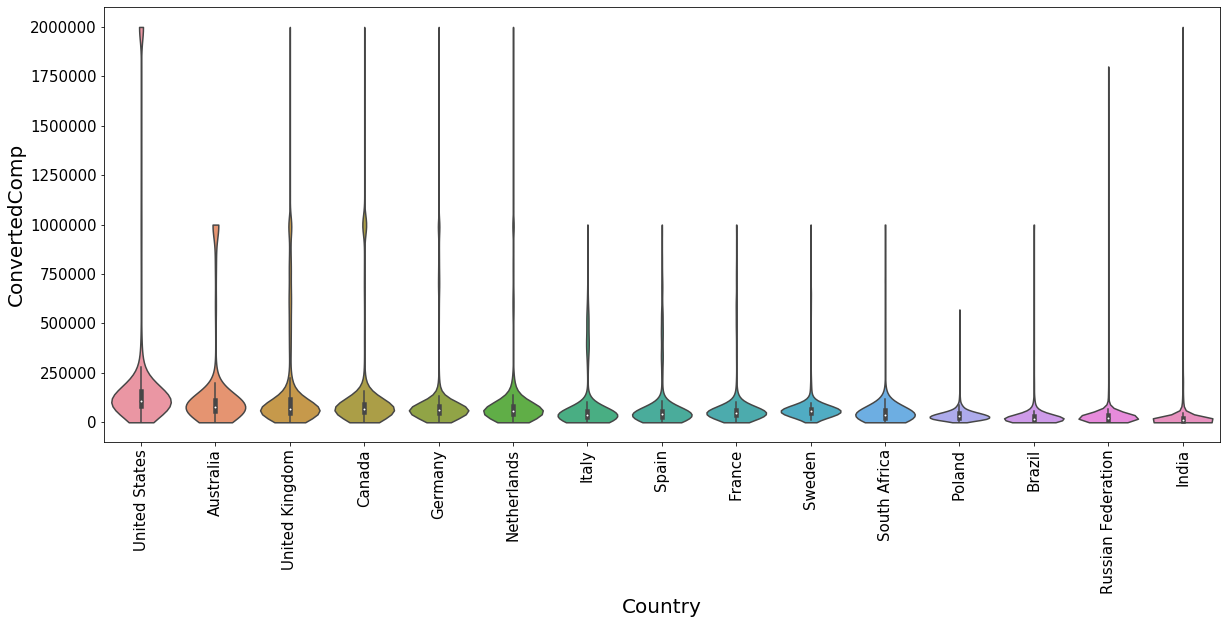

In [67]:
test = df.groupby('Country')
test = test.filter(lambda x: len(x)>=1000 or x.name == 'South Africa')
sorting = test.groupby('Country')['ConvertedComp'].mean().sort_values(ascending=False).index

fig, ax = plt.subplots(figsize=(20, 8))
ax = sns.violinplot(x='Country', y='ConvertedComp', data=test, kind='violin', cut=0, order=sorting, scale='width')
#ax.set_yscale('log')
ax.tick_params(labelsize=15)
ax.set_xlabel(ax.get_xlabel(), fontsize=20)
ax.set_ylabel(ax.get_ylabel(), fontsize=20)
ax.set_xticklabels(labels=ax.get_xticklabels(), rotation='vertical', fontdict={'fontsize':15})
;


''

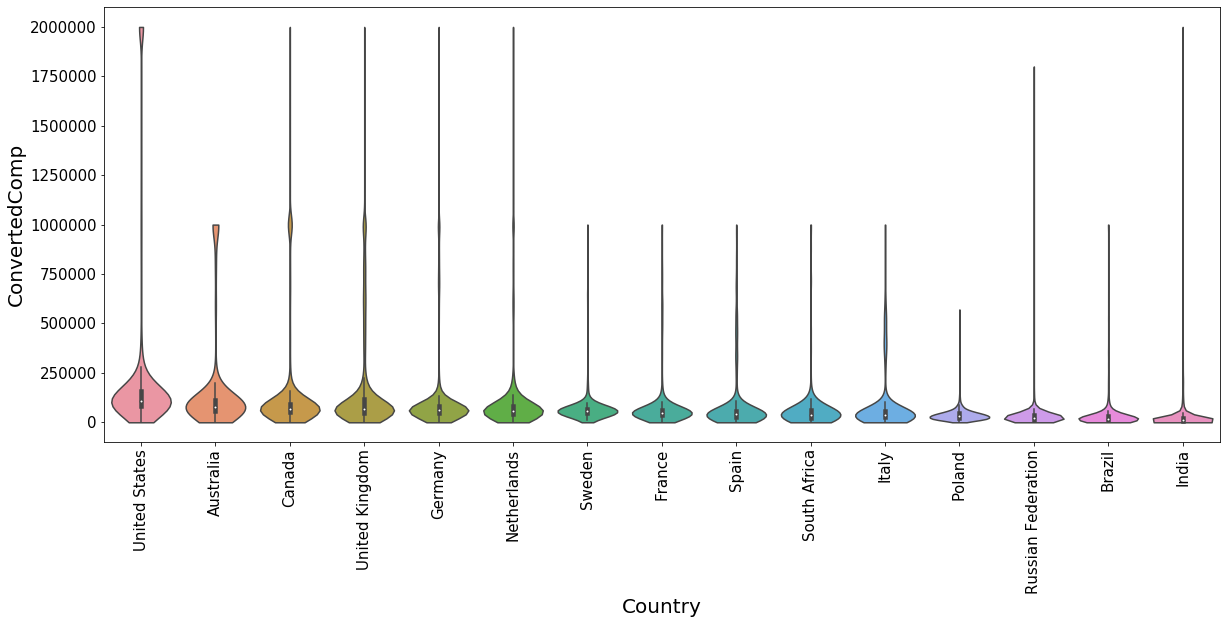

In [69]:
test = df.groupby('Country')
test = test.filter(lambda x: len(x)>=1000 or x.name == 'South Africa')
sorting = test.groupby('Country')['ConvertedComp'].median().sort_values(ascending=False).index

fig, ax = plt.subplots(figsize=(20, 8))
ax = sns.violinplot(x='Country', y='ConvertedComp', data=test, kind='violin', cut=0, order=sorting, scale='width')
#ax.set_yscale('log')
ax.tick_params(labelsize=15)
ax.set_xlabel(ax.get_xlabel(), fontsize=20)
ax.set_ylabel(ax.get_ylabel(), fontsize=20)
ax.set_xticklabels(labels=ax.get_xticklabels(), rotation='vertical', fontdict={'fontsize':15})
;


In [60]:
df['ConvertedComp']

0            NaN
1            NaN
2         8820.0
3        61000.0
4            NaN
          ...   
88878        NaN
88879        NaN
88880        NaN
88881        NaN
88882        NaN
Name: ConvertedComp, Length: 88883, dtype: float64

''

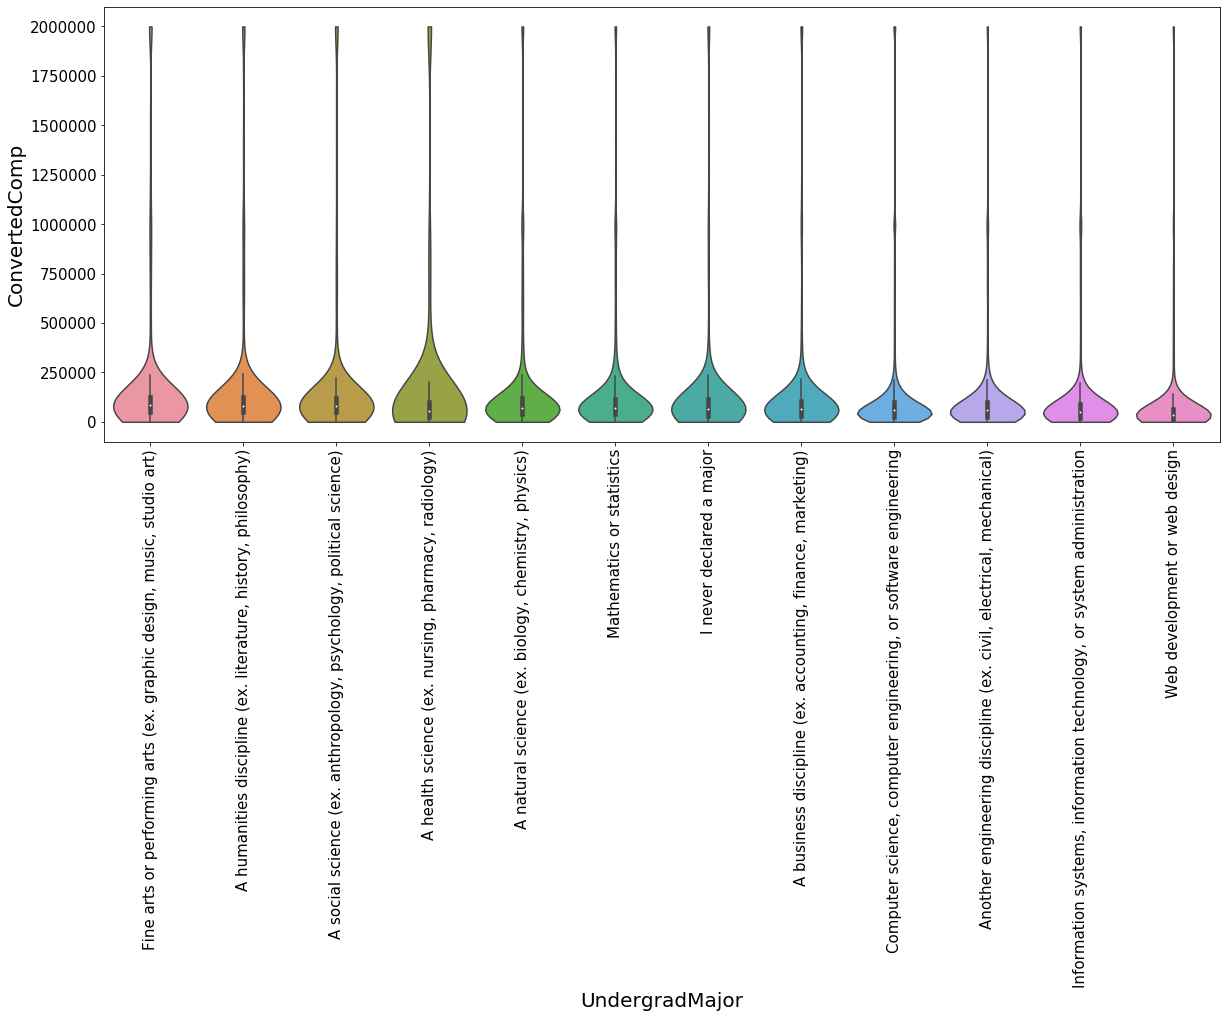

In [66]:
#test = df.groupby('UndergradMajor')
#test = test.filter(lambda x: len(x)>=1000 or x.name == 'South Africa')
sorting = df.groupby('UndergradMajor')['ConvertedComp'].mean().sort_values(ascending=False).index

fig, ax = plt.subplots(figsize=(20, 8))
ax = sns.violinplot(x='UndergradMajor', y='ConvertedComp', data=df, kind='violin', cut=0, order=sorting, scale='width')
#ax.set_yscale('log')
ax.tick_params(labelsize=15)
ax.set_xlabel(ax.get_xlabel(), fontsize=20)
ax.set_ylabel(ax.get_ylabel(), fontsize=20)
ax.set_xticklabels(labels=ax.get_xticklabels(), rotation='vertical', fontdict={'fontsize':15})
;

''

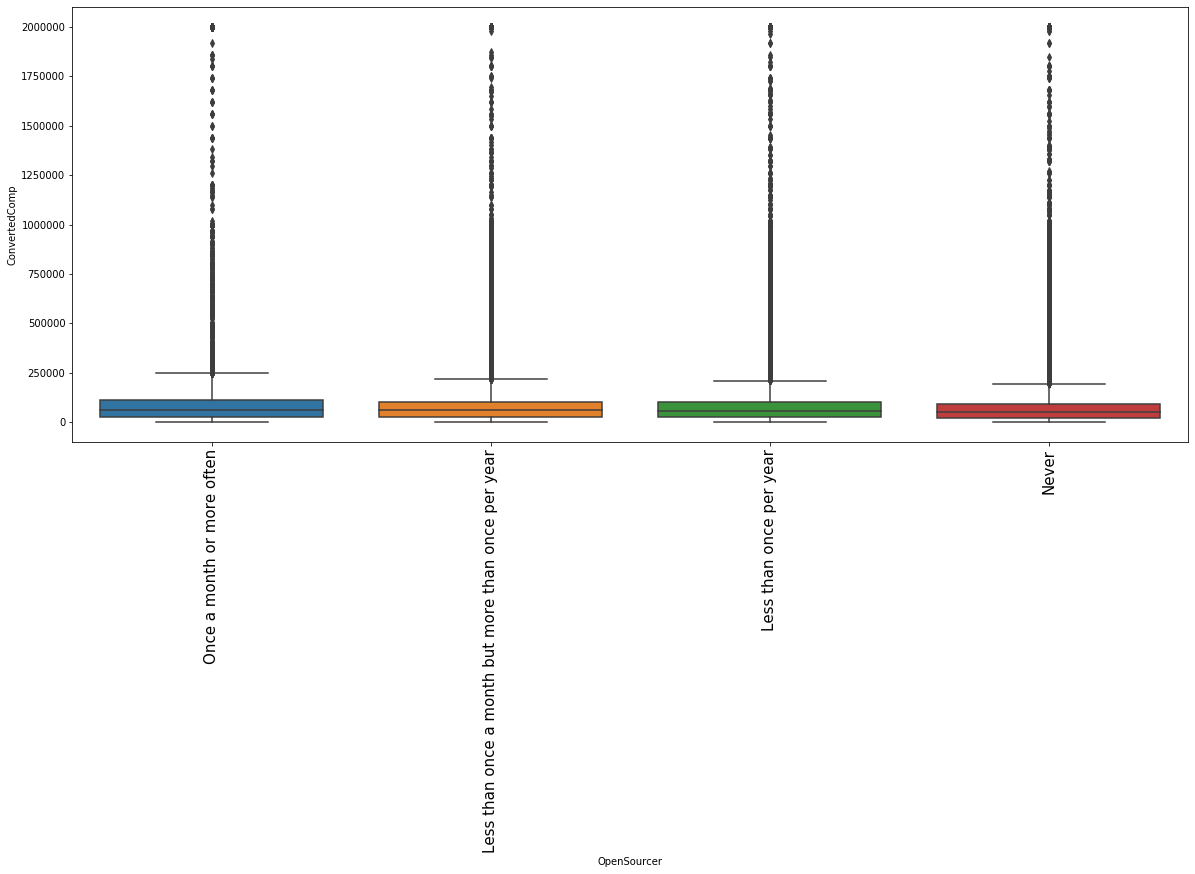

In [83]:
#test = df.groupby('UndergradMajor')
#test = test.filter(lambda x: len(x)>=1000 or x.name == 'South Africa')
sorting = df.groupby('OpenSourcer')['ConvertedComp'].mean().sort_values(ascending=False).index

fig, ax = plt.subplots(figsize=(20, 8))
ax = sns.boxplot(x='OpenSourcer', y='ConvertedComp', data=df, order=sorting)
#ax.set_yscale('log')
#ax.tick_params(labelsize=15)
#ax.set_xlabel(ax.get_xlabel(), fontsize=20)
#ax.set_ylabel(ax.get_ylabel(), fontsize=20)
ax.set_xticklabels(labels=ax.get_xticklabels(), rotation='vertical', fontdict={'fontsize':15})
;

''

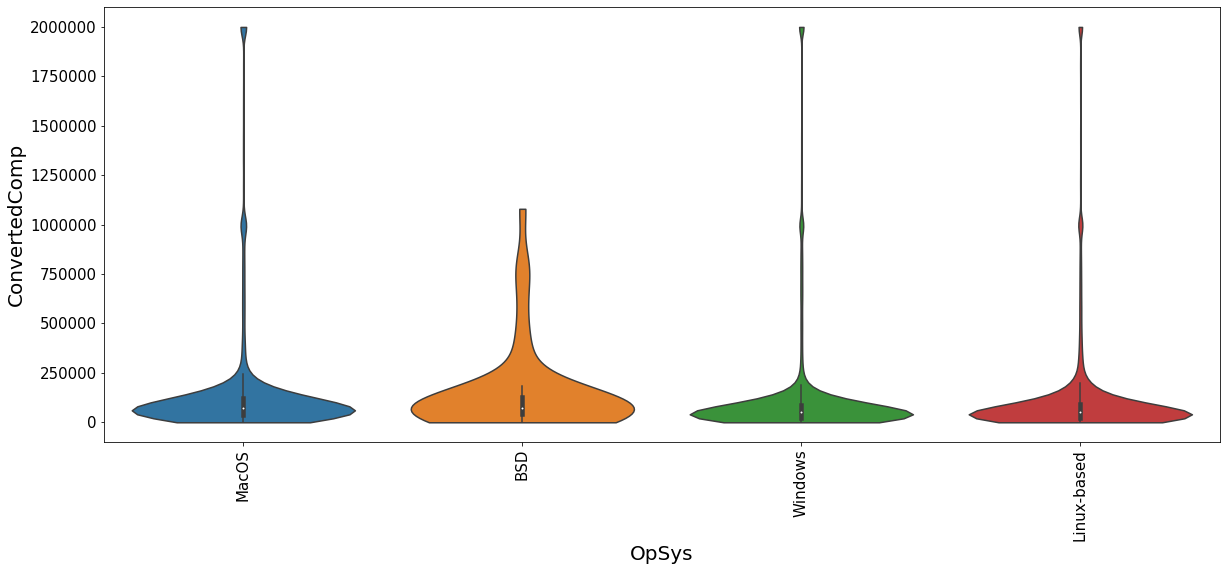

In [75]:
#test = df.groupby('UndergradMajor')
#test = test.filter(lambda x: len(x)>=1000 or x.name == 'South Africa')
sorting = df.groupby('OpSys')['ConvertedComp'].mean().sort_values(ascending=False).index

fig, ax = plt.subplots(figsize=(20, 8))
ax = sns.violinplot(x='OpSys', y='ConvertedComp', data=df, kind='violin', cut=0, order=sorting, scale='width')
#ax.set_yscale('log')
ax.tick_params(labelsize=15)
ax.set_xlabel(ax.get_xlabel(), fontsize=20)
ax.set_ylabel(ax.get_ylabel(), fontsize=20)
ax.set_xticklabels(labels=ax.get_xticklabels(), rotation='vertical', fontdict={'fontsize':15})
;

## Modeling

## Evaluation

## Deployment

In [2]:
import pandas as pd

In [42]:
df_original = pd.read_csv("./data/survey_results_public.csv")

In [43]:
df = df_original.copy()